## Proyecto 2 Inteligencia Artificial

### Integrantes : 

Juan David Varela 201910305 <br>
Andres Felipe Peralta 201910301<br>
Mario Alejandor Eraso 201910326<br>
Jorge Alejandro Rojas 201910354

### Utilizando los datos de "Heart Disease" 
#### [Datos](https://www.kaggle.com/ronitf/heart-disease-uci)

Descripcion : 
Estos datos contienen 76 atributos, pero todos fueron publicados para un experimento usando un subconjunto de 14 en ellos.


## Tabla de relacion:


|Atributo|variable|descripcion|
|:--------|:-------:|-----------:|
|Edad|age||
|Sexo|sex|sexo de la persona: <br>0 = Hombre <br>1 = Mujer|
|Tipo de dolor|cp||
|precion arterial|trestbps|
|colesterol|chol||
|azucar en la sangre|fbs||
|resultados de electrocardio|restecg||
|fecuencia cardiaca|thalach|fecuencia cardiaca maxima alcanzada|
|angina inducida por ejercicio|exang||
|depresión del ST|oldpeak|depresión del ST inducida por el ejercicio en relación con el descanso|
|la pendiente del segmento ST de ejercicio pico|slope||
|Número de vasos|ca|Número de vasos principales coloreados por floración|
||thal|3 = normal<br> 6 = defecto fijo<br> 7 = defecto reversible |
|objetivo|target|0 = No <br> 1 = Si||





### Carga de Dependencias
###### Nota se utilizo pip de python para cargar librerias.



In [163]:
# Comandos para instalar librerias con pip

! pip install numpy
! pip install pandas
! pip install sklearn
! pip install matplotlib
! pip install graphviz
! pip install seaborn


## Import libs y cargar el Data Frame

In [42]:
## Import librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix
import seaborn as sns
from IPython.display import SVG, display
import graphviz
from graphviz import Source


## leer archivo csv
data = pd.read_csv('heart.csv')
data.head()




,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Diagrama de los datos

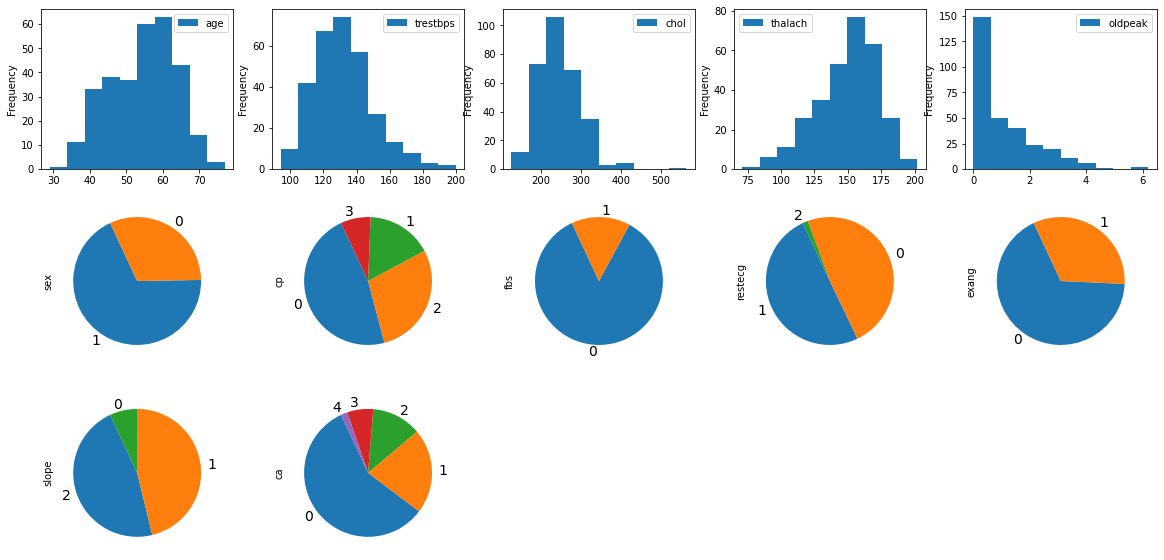

In [43]:
# utilizando matplotlib para generar grafico

#Crear Categorias para los datos

#Categorias de Rango grandes
clasificacionRangoB = ['age', 'trestbps', 'chol', 'thalach','oldpeak'];

#Categorias de rangos pequeños
clasificacionRangoS = ['sex','cp','fbs','restecg','exang','slope','ca']


# instanciar una grafico 
graph = plt.figure(figsize=(20,10))

i = 1
#Creando Histograma
for categoriaB in clasificacionRangoB:
    xG = graph.add_subplot(3,5,i)
    data[[categoriaB]].plot(kind='hist', ax=xG, rwidth=1)
    i= i +1

i = 6
for categoriaS in clasificacionRangoS:
    xG = graph.add_subplot(3,5,i)
    data[categoriaS].value_counts().plot(kind='pie', ax=xG, startangle=115, fontsize=14)
    i = i + 1

plt.show()



## Arbol de decision:

### Tramiento de Datos

En esta parte lo que se hace es tratar los datos haciendo :

- Crear una copia de los datos originales
- Eliminar datos nulos
- Crear Arbol
- Crear variables de entrenamiento

In [44]:
# Copia de datos
data_c = data.copy()

print("Datos antes de eleminar los nulls: ", len(data_c))
data_c = data_c.dropna()
print("Datos sin nulls: ", len(data_c))

# Separacion de Datos
targetData = data_c.target.values
# Datos sin la clasificacion del target
dataCaracter = data_c.drop(['target'],axis = 1 )

# funcion para sacar los datos de entrenamiento donde se dice que el 20% es de test y el 80% de entrenamiento
def entrenamientoF():
    X_entrenamiento, X_test,y_entrenamiento,y_test = train_test_split(dataCaracter,targetData,test_size=0.2)
    return X_entrenamiento, X_test,y_entrenamiento,y_test
#Conjunto de entrenamiento 

Xe,Xt,ye,yt = entrenamientoF()


#Cargamos el arbol de decision 
arbol = DecisionTreeClassifier()



Datos antes de eleminar los nulls:  303
Datos sin nulls:  303


### Entrenamiento y Ejecutar 

En esta parte es donde se ejecuta el arbol y donde se entrenan las variables

In [45]:
#Entrenar el arbol
arbol.fit(Xe,ye)

DecisionTreeClassifier()

In [46]:
# Prediccion con respecto a las pruebas
arbol.score(Xt,yt)

0.7213114754098361

In [47]:
# prediccion con respecto a los datos de entrenamiento
arbol.score(Xe,ye)

1.0

### Entrenamientos Multiples y generador de tabla

En el siguiente lo que se hace es hacer los entrenamientos en el arbol de decisicion de manera iterativa con un rango de 20

donde se clasifica 

|iteracion|promedio entreno|promedio test|
|:-------:|----------------|:-----------:|



In [48]:
# Nuevo arreglo donde se guardan los datos
matrix_save = []


#iteracion de entrenamiento y guardado
for i in range(0,20):
    entrenoX_data1,testX_data1,entrenoy_data1,testy_data1 = entrenamientoF()
    matrix_save.append([entrenoX_data1,testX_data1,entrenoy_data1,testy_data1])
    
# Funcion que entrena en forma de arbol de decision
def trainArbolD(entrenoX_data1,entrenoy_data1):
    modelT = DecisionTreeClassifier()
    
    return modelT.fit(entrenoX_data1,entrenoy_data1)


#Entrenando modelo de prueba
modelTT = trainArbolD(Xe,ye)


# Crear dataframe con los score de cada prueba
tableScore = pd.DataFrame(columns = ['iteracion','promedio_entreno','promedio_test'])

for i,j in enumerate(matrix_save):
    # Obtiene el modelo de la matrix
    model_mat_heart = trainArbolD(j[0],j[2])
    
    # Coseguir el id de el test
    tableScore.loc[i,'iteracion'] = i
    
    # Obtener el valor de el entrenamiento
    tableScore.loc[i,'promedio_entreno'] = model_mat_heart.score(j[0],j[2])
    
    # Obtener el valor de el test
    tableScore.loc[i,'promedio_test'] = model_mat_heart.score(j[1],j[3])

# Mostrar tabla    
display(tableScore.head(20))
    
# Valor promedio entrenamiento
print("Valor promedio de predicion de entrenamiento: ", tableScore['promedio_entreno'].mean(),)
print("Desviacion del entrenamiento: ", tableScore['promedio_entreno'].std())

# Valor promedio test
print("Valor promedio de predicion de test: ", tableScore['promedio_test'].mean(),)
print("Desviacion del test: ", tableScore['promedio_test'].std())





,iteracion,promedio_entreno,promedio_test
0,0,1,0.754098
1,1,1,0.786885
2,2,1,0.688525
3,3,1,0.803279
4,4,1,0.770492
5,5,1,0.704918
6,6,1,0.803279
7,7,1,0.770492
8,8,1,0.754098
9,9,1,0.704918


Valor promedio de predicion de entrenamiento:  1.0
Desviacion del entrenamiento:  0.0
Valor promedio de predicion de test:  0.7606557377049181
Desviacion del test:  0.05222120384377345


### Matriz de Confusion

![matriz](https://upload.wikimedia.org/wikipedia/commons/9/9c/Matriz_confusion.png)





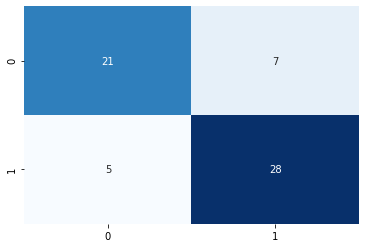

In [49]:
# Se hace la prediccion del modelo
prediccionMT = modelTT.predict(Xt)


#Matriz de Confusion
cm_heart = confusion_matrix(yt,prediccionMT.round())
sns.heatmap(cm_heart, annot=True, cmap="Blues",fmt="d", cbar=False)


In [50]:
modelTT

DecisionTreeClassifier()

### Arbol de decision

Grafica del Arbol de Desicion



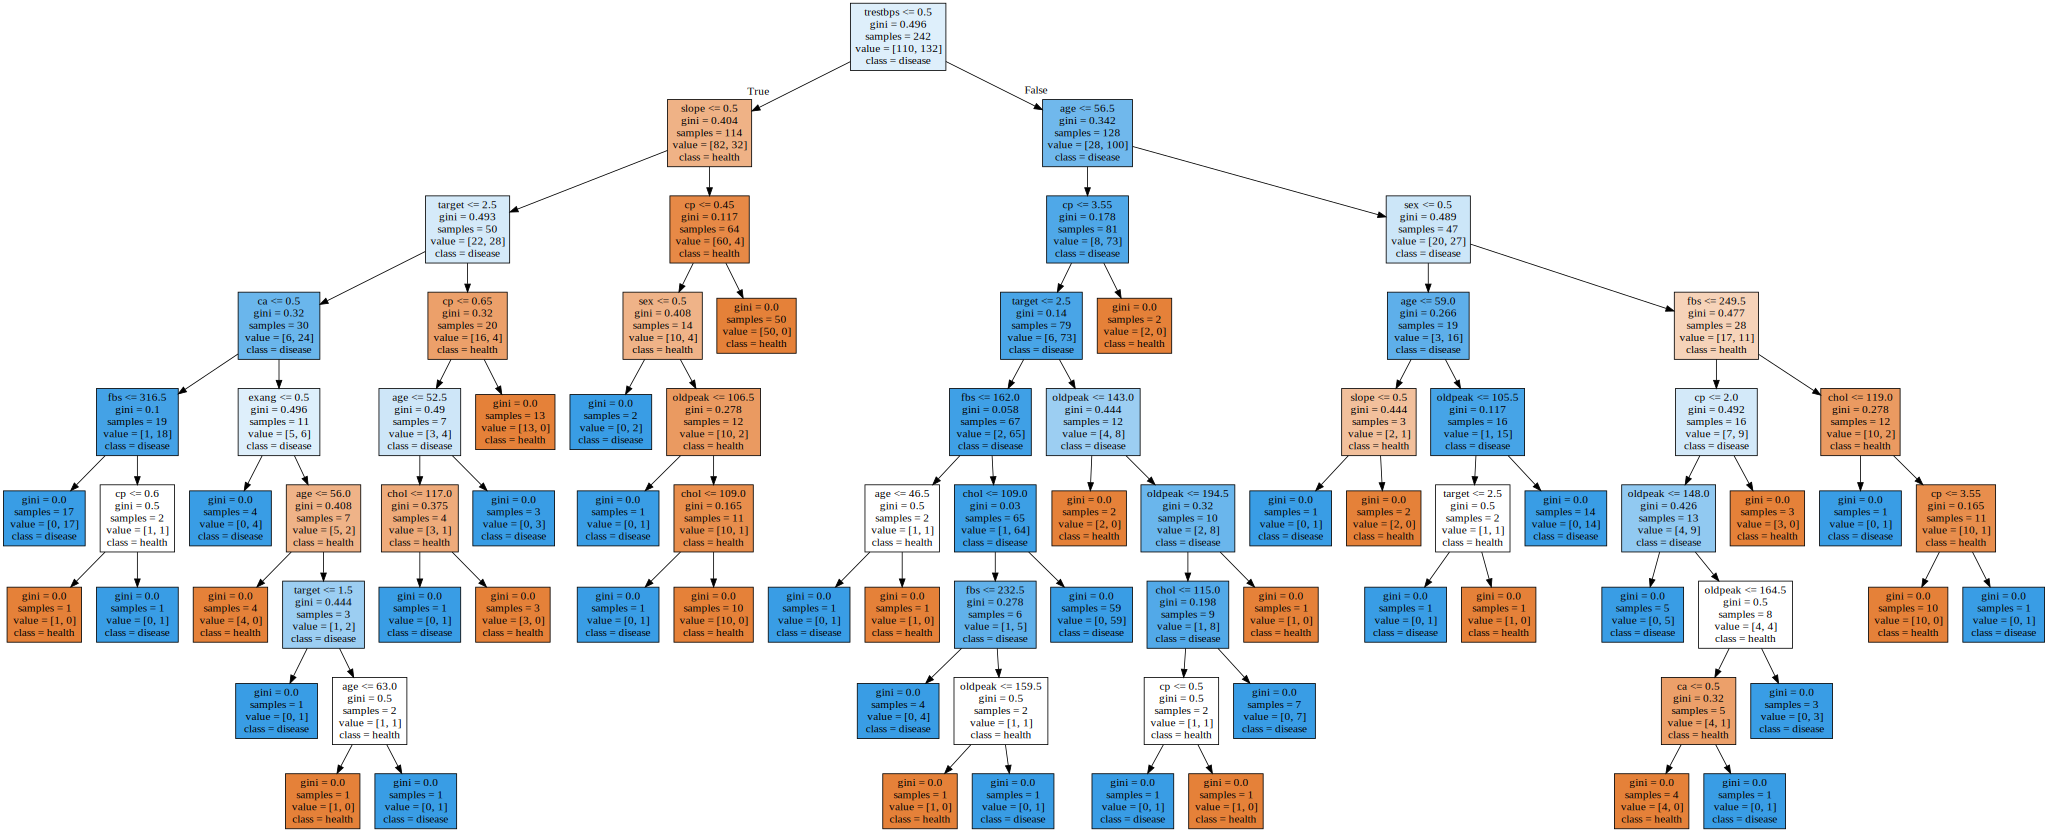

In [51]:
# Etiquetas

class_names = ["health", "disease"]
features_heart_labels = ["age", "sex", "trestbps", "chol", "fbs", "thalach", "exang", 
                         "oldpeak", "ca","cp","restecg","slope","target"]


graph = Source(export_graphviz(modelTT, out_file=None,
                                    feature_names=features_heart_labels, 
                                    class_names=class_names, filled = True))
display(SVG(graph.pipe(format='svg')))

### Importancia de los datos

El siguiente grafico muestra cual es la variable mas importante a la hora de tomar la desicion

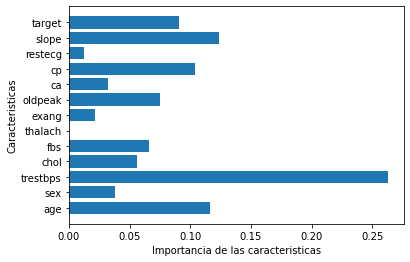

In [52]:
plt.barh(range(len(features_heart_labels)),arbol.feature_importances_)
plt.yticks(np.arange(len(features_heart_labels)),features_heart_labels)
plt.xlabel("Importancia de las caracteristicas")
plt.ylabel("Caracteristicas")
plt.show()

### Observacion

Como podemos ver lo que sucede en nuestro modelo es que tenemos un sobreajuste ya que la diferencia de probabilidad en los datos de entrenamiento esta siendo del 100% y si los comparamos con respecto a los datos de test la diferencia es notoria.


Trataremos de arreglar esto

In [53]:
# Cambiar la profundidad del arbol

arbol = DecisionTreeClassifier(max_depth= 4)

### Entrenamiento y Ejecutar 

In [54]:
#Entrenar el arbol
arbol.fit(Xe,ye)

DecisionTreeClassifier(max_depth=4)

In [55]:
arbol.score(Xt,yt)

0.7868852459016393

In [56]:
# prediccion con respecto a los datos de entrenamiento
arbol.score(Xe,ye)

0.8842975206611571

### Entrenamientos Multiples y generador de tabla

In [57]:
# Nuevo arreglo donde se guardan los datos
matrix_save = []


#iteracion de entrenamiento y guardado
for i in range(0,20):
    entrenoX_data1,testX_data1,entrenoy_data1,testy_data1 = entrenamientoF()
    matrix_save.append([entrenoX_data1,testX_data1,entrenoy_data1,testy_data1])
    
# Funcion que entrena en forma de arbol de decision
def trainArbolD(entrenoX_data1,entrenoy_data1):
    modelT = DecisionTreeClassifier(max_depth=4)
    
    return modelT.fit(entrenoX_data1,entrenoy_data1)


#Entrenando modelo de prueba
modelTT = trainArbolD(Xe,ye)


# Crear dataframe con los score de cada prueba
tableScore = pd.DataFrame(columns = ['iteracion','promedio_entreno','promedio_test'])

for i,j in enumerate(matrix_save):
    # Obtiene el modelo de la matrix
    model_mat_heart = trainArbolD(j[0],j[2])
    
    # Coseguir el id de el test
    tableScore.loc[i,'iteracion'] = i
    
    # Obtener el valor de el entrenamiento
    tableScore.loc[i,'promedio_entreno'] = model_mat_heart.score(j[0],j[2])
    
    # Obtener el valor de el test
    tableScore.loc[i,'promedio_test'] = model_mat_heart.score(j[1],j[3])

# Mostrar tabla    
display(tableScore.head(20))
    
# Valor promedio entrenamiento
print("Valor promedio de predicion de entrenamiento: ", tableScore['promedio_entreno'].mean(),)
print("Desviacion del entrenamiento: ", tableScore['promedio_entreno'].std())

# Valor promedio test
print("Valor promedio de predicion de test: ", tableScore['promedio_test'].mean(),)
print("Desviacion del test: ", tableScore['promedio_test'].std())

,iteracion,promedio_entreno,promedio_test
0,0,0.884298,0.672131
1,1,0.880165,0.754098
2,2,0.904959,0.704918
3,3,0.900826,0.721311
4,4,0.876033,0.852459
5,5,0.884298,0.770492
6,6,0.88843,0.836066
7,7,0.880165,0.786885
8,8,0.909091,0.721311
9,9,0.880165,0.786885


Valor promedio de predicion de entrenamiento:  0.8867768595041321
Desviacion del entrenamiento:  0.013698502102142551
Valor promedio de predicion de test:  0.760655737704918
Desviacion del test:  0.05688809286388828


### Matriz de Confusion

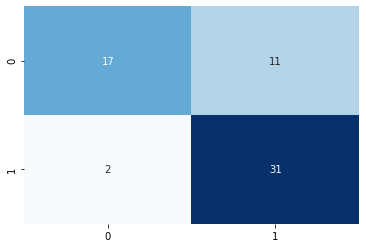

In [59]:
# Se hace la prediccion del modelo
prediccionMT = modelTT.predict(Xt)


#Matriz de Confusion
cm_heart = confusion_matrix(yt,prediccionMT.round())
sns.heatmap(cm_heart, annot=True, cmap="Blues",fmt="d", cbar=False)

### Arbol de decision


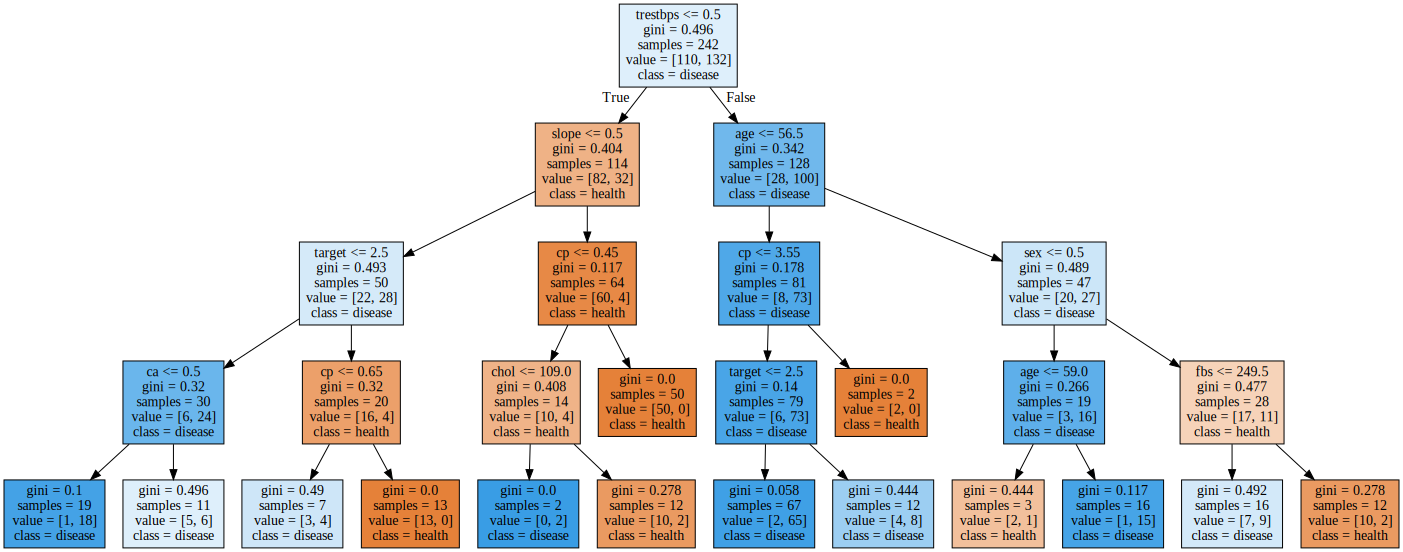

In [60]:
# Etiquetas

class_names = ["health", "disease"]
features_heart_labels = ["age", "sex", "trestbps", "chol", "fbs", "thalach", "exang", 
                         "oldpeak", "ca","cp","restecg","slope","target"]


graph = Source(export_graphviz(modelTT, out_file=None,
                                    feature_names=features_heart_labels, 
                                    class_names=class_names, filled = True))
display(SVG(graph.pipe(format='svg')))

### Importancia de los datos


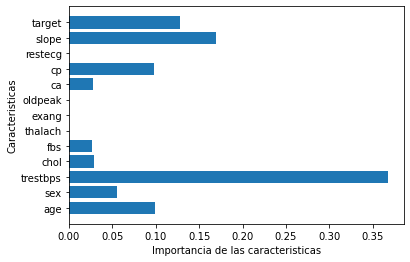

In [61]:
plt.barh(range(len(features_heart_labels)),arbol.feature_importances_)
plt.yticks(np.arange(len(features_heart_labels)),features_heart_labels)
plt.xlabel("Importancia de las caracteristicas")
plt.ylabel("Caracteristicas")
plt.show()

## Naive Bayes

Ahora implementaremos el modelo de Naive Bayes de Bernoulli

Ya que este se usa para clasificaciones de problemas binarios


### Importar librerias

In [50]:
# importar las librerias para el Naive Bayes
from sklearn.datasets import make_classification
from sklearn.naive_bayes import BernoulliNB


X_train, X_test, Y_train, Y_test = entrenamientoF()
bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_train, Y_train)
bnb.score(X_test, Y_test)


0.819672131147541

### Entrenamientos Multiples y generador de tabla

En el siguiente lo que se hace es hacer los entrenamientos en el arbol de decisicion de manera iterativa con un rango de 20

donde se clasifica 

|iteracion|promedio entreno|promedio test|
|:-------:|----------------|:-----------:|


In [54]:
# Nuevo arreglo donde se guardan los datos
matrix_save = []


#iteracion de entrenamiento y guardado
for i in range(0,20):
    entrenoX_data1,testX_data1,entrenoy_data1,testy_data1 = entrenamientoF()
    matrix_save.append([entrenoX_data1,testX_data1,entrenoy_data1,testy_data1])
    
# Funcion que entrena en forma de arbol de decision
def trainNaiveBayel(entrenoX_data1,entrenoy_data1):
    bnb = BernoulliNB(binarize=0.0)
    
    return bnb.fit(X_train, Y_train)



#Entrenando modelo de prueba
modelTT = trainNaiveBayel(Xe,ye)


# Crear dataframe con los score de cada prueba
tableScore = pd.DataFrame(columns = ['iteracion','promedio_entreno','promedio_test'])

for i,j in enumerate(matrix_save):
    # Obtiene el modelo de la matrix
    model_mat_heart = trainNaiveBayel(j[0],j[2])
    
    # Coseguir el id de el test
    tableScore.loc[i,'iteracion'] = i
    
    # Obtener el valor de el entrenamiento
    tableScore.loc[i,'promedio_entreno'] = model_mat_heart.score(j[0],j[2])
    
    # Obtener el valor de el test
    tableScore.loc[i,'promedio_test'] = model_mat_heart.score(j[1],j[3])

# Mostrar tabla    
display(tableScore.head(20))
    
# Valor promedio entrenamiento
print("Valor promedio de predicion de entrenamiento: ", tableScore['promedio_entreno'].mean(),)
print("Desviacion del entrenamiento: ", tableScore['promedio_entreno'].std())

# Valor promedio test
print("Valor promedio de predicion de test: ", tableScore['promedio_test'].mean(),)
print("Desviacion del test: ", tableScore['promedio_test'].std())


,iteracion,promedio_entreno,promedio_test
0,0,0.826446,0.770492
1,1,0.797521,0.885246
2,2,0.818182,0.803279
3,3,0.830579,0.754098
4,4,0.81405,0.819672
5,5,0.81405,0.819672
6,6,0.81405,0.819672
7,7,0.81405,0.819672
8,8,0.826446,0.770492
9,9,0.818182,0.803279


Valor promedio de predicion de entrenamiento:  0.812809917355372
Desviacion del entrenamiento:  0.010982067063482738
Valor promedio de predicion de test:  0.8245901639344261
Desviacion del test:  0.043568200481357726


### Matriz de Confusion


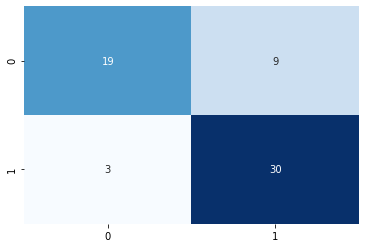

In [55]:
# Se hace la prediccion del modelo
prediccionMT = modelTT.predict(Xt)


#Matriz de Confusion
cm_heart = confusion_matrix(yt,prediccionMT.round())
sns.heatmap(cm_heart, annot=True, cmap="Blues",fmt="d", cbar=False)


### Red Neuronal

Esta es la implementacion del problema apartir de una red neuronal

In [82]:
#importar librerias
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report




#traer datos
X_train, X_test, y_train, y_test = entrenamientoF()
scaler = StandardScaler()
scaler.fit(X_train)




StandardScaler()

In [83]:
StandardScaler(copy = True, with_mean=True, with_std= True)


StandardScaler()

In [84]:
# Transformacion de los datos con la funcion escalon:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [85]:
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=700)

mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(13, 13, 13), max_iter=700)

In [86]:
predictions = mlp.score(X_test,y_test)
predictions

0.8032786885245902

In [87]:
# Nuevo arreglo donde se guardan los datos
matrix_save = []


#iteracion de entrenamiento y guardado
for i in range(0,20):
    entrenoX_data1,testX_data1,entrenoy_data1,testy_data1 = entrenamientoF()
    matrix_save.append([entrenoX_data1,testX_data1,entrenoy_data1,testy_data1])
    
# Funcion que entrena en forma de arbol de decision
def neuronal(entrenoX_data1,entrenoy_data1):
    mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=700)
    
    return mlp.fit(X_train,y_train)



#Entrenando modelo de prueba
modelTT = neuronal(Xe,ye)


# Crear dataframe con los score de cada prueba
tableScore = pd.DataFrame(columns = ['iteracion','promedio_entreno','promedio_test'])

for i,j in enumerate(matrix_save):
    # Obtiene el modelo de la matrix
    model_mat_heart = neuronal(j[0],j[2])
    
    # Coseguir el id de el test
    tableScore.loc[i,'iteracion'] = i
    
    # Obtener el valor de el entrenamiento
    tableScore.loc[i,'promedio_entreno'] = model_mat_heart.score(j[0],j[2])
    
    # Obtener el valor de el test
    tableScore.loc[i,'promedio_test'] = model_mat_heart.score(j[1],j[3])

# Mostrar tabla    
display(tableScore.head(20))
    
# Valor promedio entrenamiento
print("Valor promedio de predicion de entrenamiento: ", tableScore['promedio_entreno'].mean(),)
print("Desviacion del entrenamiento: ", tableScore['promedio_entreno'].std())

# Valor promedio test
print("Valor promedio de predicion de test: ", tableScore['promedio_test'].mean(),)
print("Desviacion del test: ", tableScore['promedio_test'].std())


C:\Users\hikigo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hikigo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hikigo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hikigo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hikigo\anaconda3\lib\site-packages\sklearn\neural_network\_

,iteracion,promedio_entreno,promedio_test
0,0,0.466942,0.409836
1,1,0.557851,0.52459
2,2,0.628099,0.672131
3,3,0.553719,0.639344
4,4,0.520661,0.540984
5,5,0.46281,0.442623
6,6,0.578512,0.557377
7,7,0.458678,0.442623
8,8,0.433884,0.540984
9,9,0.466942,0.409836


Valor promedio de predicion de entrenamiento:  0.5018595041322313
Desviacion del entrenamiento:  0.05515488234983081
Valor promedio de predicion de test:  0.5032786885245902
Desviacion del test:  0.07962130485007195


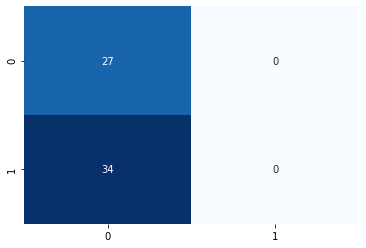

In [92]:
# Se hace la prediccion del modelo
prediccionMT = modelTT.predict(Xt)


#Matriz de Confusion
cm_heart = confusion_matrix(y_test,prediccionMT)
sns.heatmap(cm_heart, annot=True, cmap="Blues",fmt="d", cbar=False)

### Dificultad Implementacion

La implementacion como tal es muy sencilla, gracias al uso de librerias como sklearn que nos ahorra todo el proceso de progrmacion de los diferentes metodos. Lo mas complicado o mas extraño fue la implementacion de los graficos ya que estos si eran mas extensos . Pero por parte directamente de los algoritmos implementados depronto el mas complejo es el de la red neuronal que es mucho mas compleja que los otros metodos.


## Cual algoritmo es mas optimo ?

Optariamos por el arbol de decision o por el bayers ya que son algoritmos que tienen logica matematica y estan aplicadas de manera robusta. No optaria la red neuronal ya que esta deberiamos hacerla mas sofisticada para que diera los mejores resultados.


